#Exploratory data analysis & ML algorithm Implementation on Algerian forest fires dataset


**About the data set**

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 

Weather data observations

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
1. RH : Relative Humidity in %: 21 to 90
1. Ws :Wind speed in km/h: 6 to 29
1. Rain: total day in mm: 0 to 16.8 FWI Components
1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
1. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
1. Drought Code (DC) index from the FWI system: 7 to 220.4
1. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
1. Buildup Index (BUI) index from the FWI system: 1.1 to 68
1. Fire Weather Index (FWI) Index: 0 to 31.1
1. Classes: two classes, namely: 
 > * fire  
 > * not Fire


Some facts about the data set

1. This dataset contains a culmination of forest fire observations and data in two regions of Algeria:
> * Bejaia region 
> * Sidi Bel-Abbes region.

1. The Dataset contain data from June 2012 to September 2012.

## importing important libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## importing the data set

In [35]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [36]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


## Data Cleaning and Preparation

In [37]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

We can see that some the column names have extra spaces. Need to get rid of those 

In [38]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [39]:
df.shape

(247, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [41]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [42]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Here the Missing values at 122 and 123th index seprate the data set in two regions.
* Bejaia region
* Sidi Bel-Abbes region.

We can make a new column as "Region" to separately identify the regions.
We will set Bejaia as 1 and Sidi Bel-Abbes as 2

In [43]:
df['Region'] = 1

for i in range(len(df)):
  if i >= 122:
    df['Region'][i] = 2 

Droping the NaN values 

In [44]:
df = df.dropna().reset_index(drop = True)

In [45]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [46]:
df.value_counts('Classes')

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
Classes            1
not fire           1
not fire           1
not fire           1
dtype: int64

More than two classes. Need further investigation

In [47]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

We can see that some values have extra sapecs. Thats why it was showing more classes than it should be. 

In [48]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', 'Classes'], dtype=object)

There is a class name 'Classes'. Why is that?

In [49]:
df[~df.Classes.isin(['fire','not fire'])]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


May be it was created when they merged data from two region together. Filtering out unnecessary class.

In [50]:
df = df[df.Classes.isin(['fire','not fire'])]

In [51]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


Need to change the data types for the respective features for the analysis

In [53]:
df1 = df.copy()

In [54]:
df1 = df1.astype({ 
                'RH':np.int64, 'Temperature':np.int64, 
                'Ws':np.int64, 'Rain':np.float64, 
                'FFMC':np.float64 ,'DMC':np.float64, 
                'DC':np.float64, 'ISI':np.float64, 
                'BUI':np.float64, 'FWI':np.float64
                })

Encoding Not fire as 0 and Fire as 1

In [55]:
# df['Classes']= np.where(df['Classes']== 'not fire',0,1)
# df.head()

In [56]:
df1.to_csv('forest_fires.csv', index=False)

## Exploratory Data Analysis

In [57]:
df1.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243,243,243,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,31,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,1,8,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,8,62,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN
mean,NaN,NaN,NaN,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,NaN,NaN,NaN,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,NaN,NaN,NaN,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,NaN,NaN,NaN,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,NaN,NaN,NaN,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 30.4+ KB


In [59]:
numeric_col = [col for col in df1.columns if df1[col].dtype != 'object']
object_col = [col for col in df1.columns if df1[col].dtype == 'object']

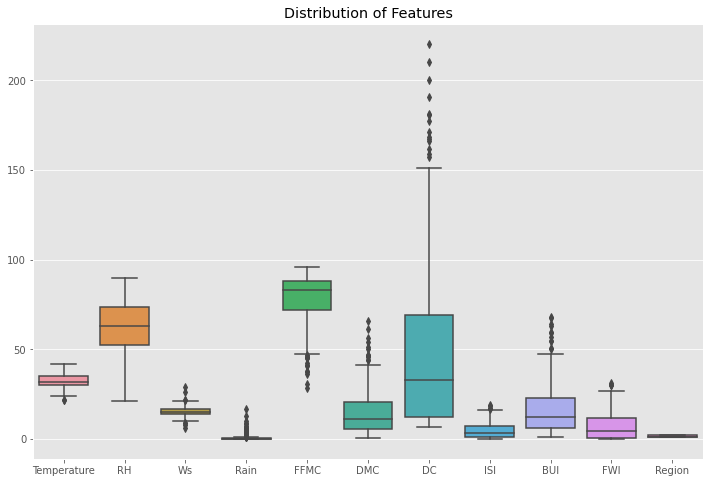

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[numeric_col])
plt.title('Distribution of Features')
plt.show()

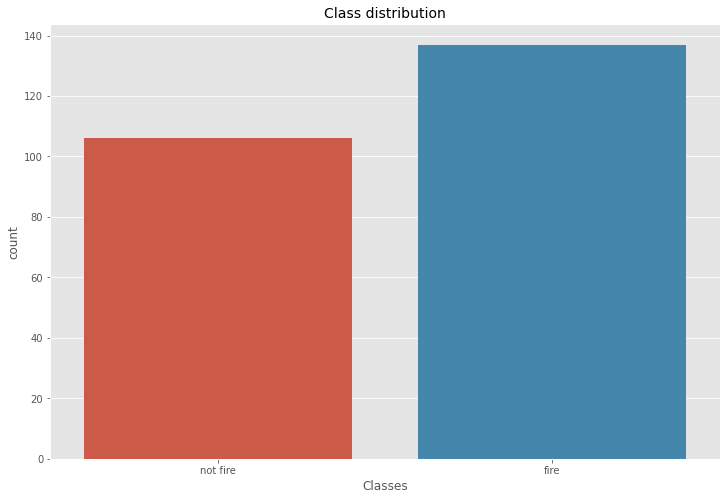

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df1 , x='Classes')
plt.title('Class distribution', fontsize = 14)
plt.show()

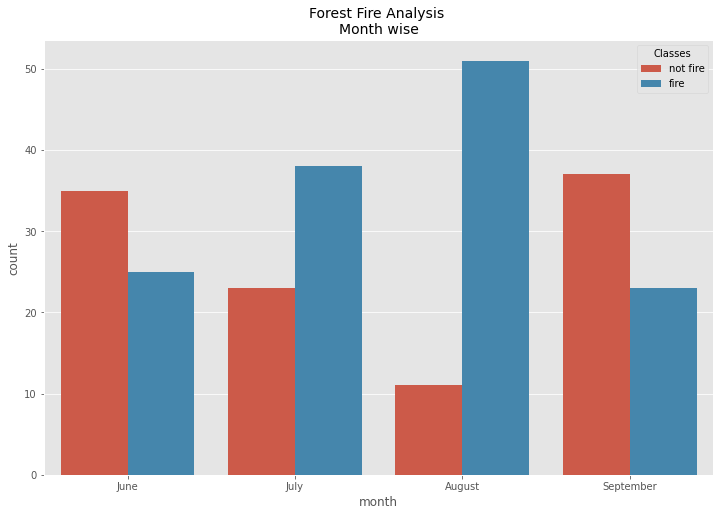

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df1 , x='month', hue='Classes')
plt.title('Forest Fire Analysis \nMonth wise', fontsize = 14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

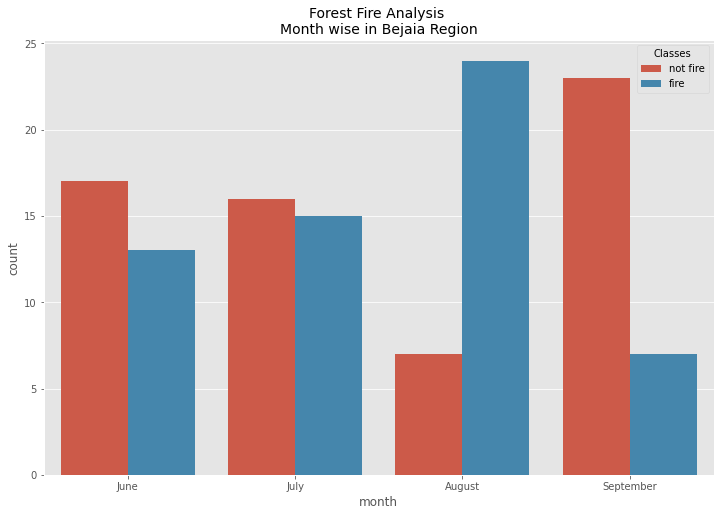

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df1[df1['Region'] == 1] , x='month', hue='Classes')
plt.title('Forest Fire Analysis \nMonth wise in Bejaia Region', fontsize = 14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

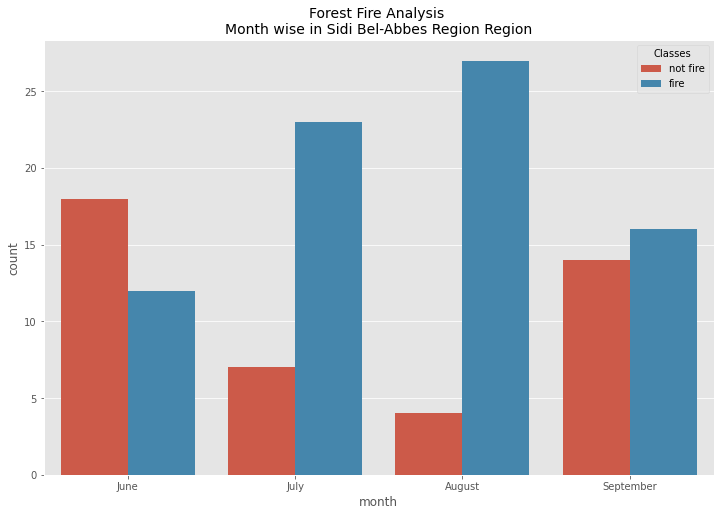

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df1[df1['Region'] == 2] , x='month', hue='Classes')
plt.title('Forest Fire Analysis \nMonth wise in Sidi Bel-Abbes Region Region', fontsize = 14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

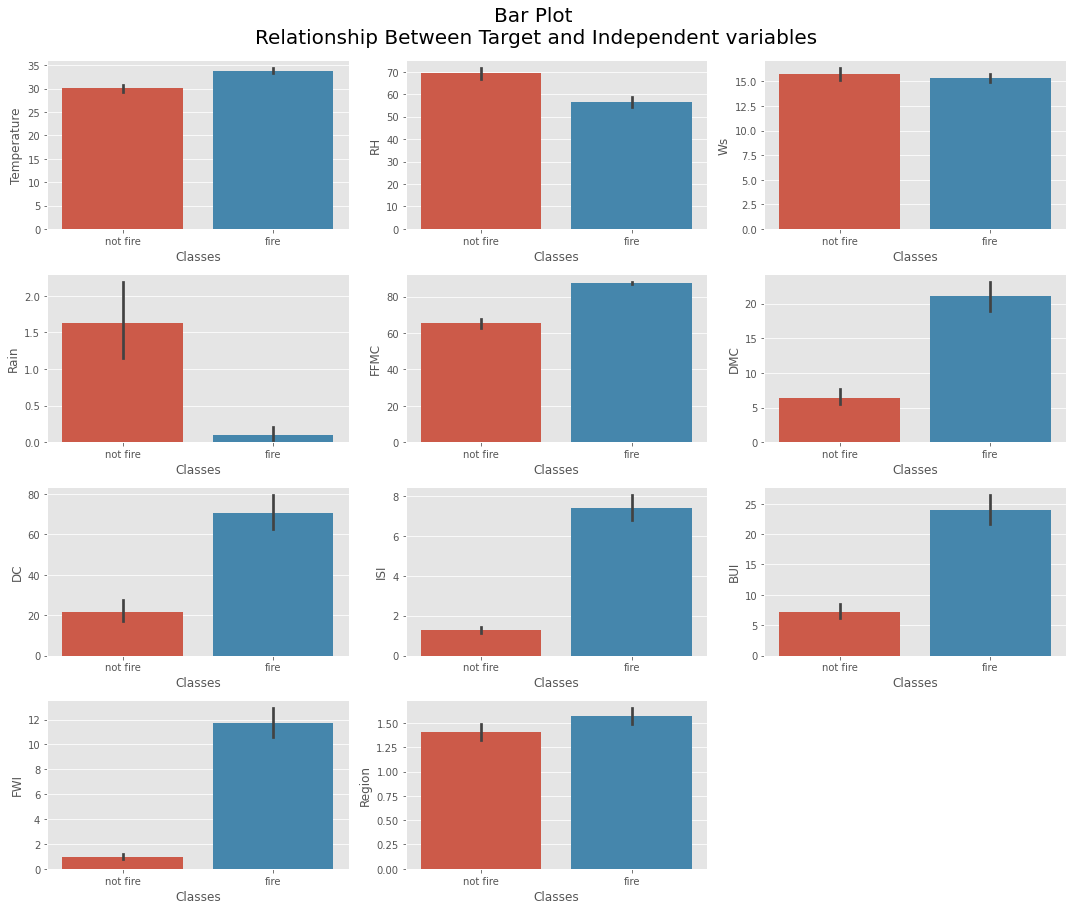

In [65]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
plt.suptitle('Bar Plot \nRelationship Between Target and Independent variables'
, fontsize=20, alpha=1, y=1.05)
for i in range(0, len(numeric_col)):
  plt.subplot(4,3,i+1)
  sns.barplot(x='Classes',
              y=numeric_col[i],
              data=df1)
  plt.tight_layout()


In [66]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102


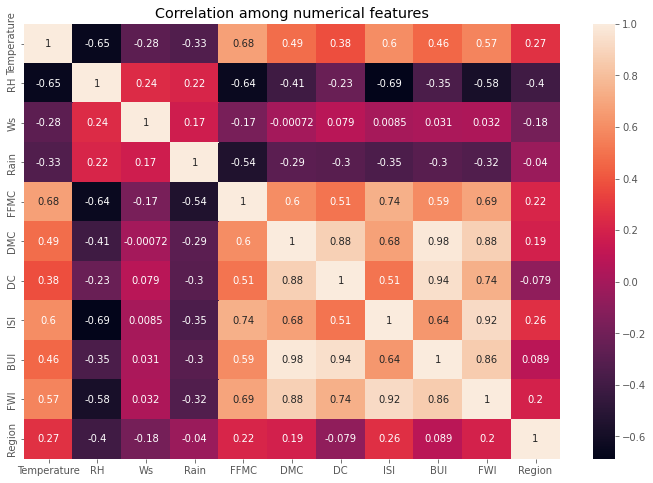

In [67]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()

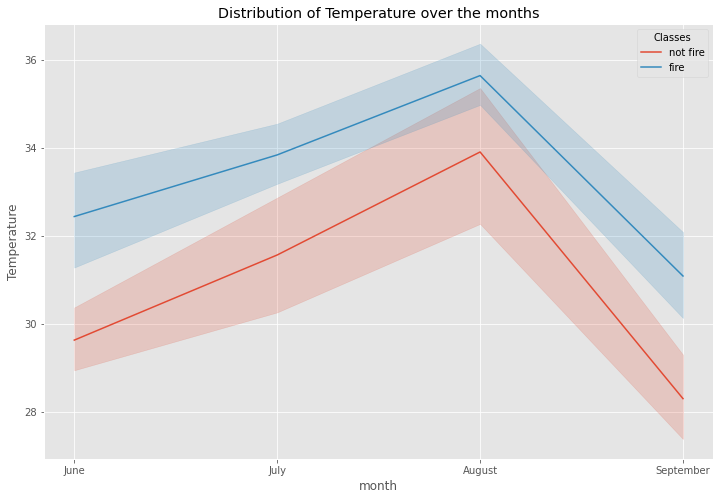

In [68]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df1, x="month", y="Temperature", color = 'g', hue = "Classes")
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.title('Distribution of Temperature over the months')
plt.show()

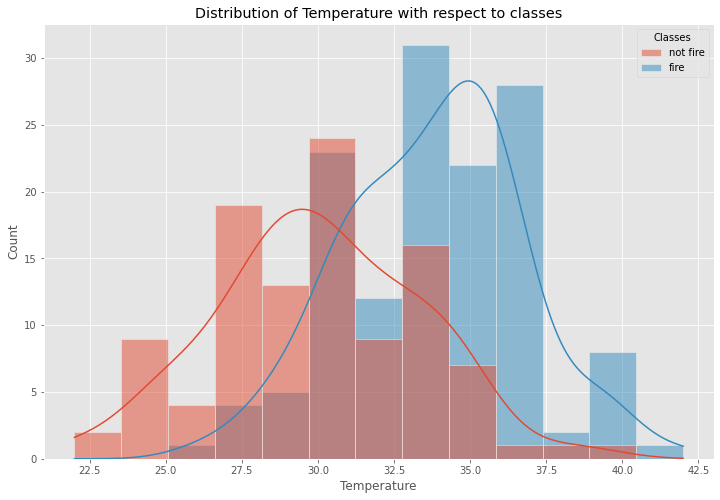

In [69]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.histplot(data = df1, x= 'Temperature', hue='Classes', kde = True)
plt.title('Distribution of Temperature with respect to classes')
plt.show()

## Modeling : Classification 

### Data preparation for modeling and Spliting the data into Training and Test set

#### Spliting the dataset into train and test

In [70]:
df2 = df1.drop(['day', 'month', 'year'], axis = 1)
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [71]:
X = df2[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI']]
y = df2['Classes']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Scaling Features

In [73]:
def standard_scaler(X_train, X_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  return X_train_scaled, X_test_scaled

In [74]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

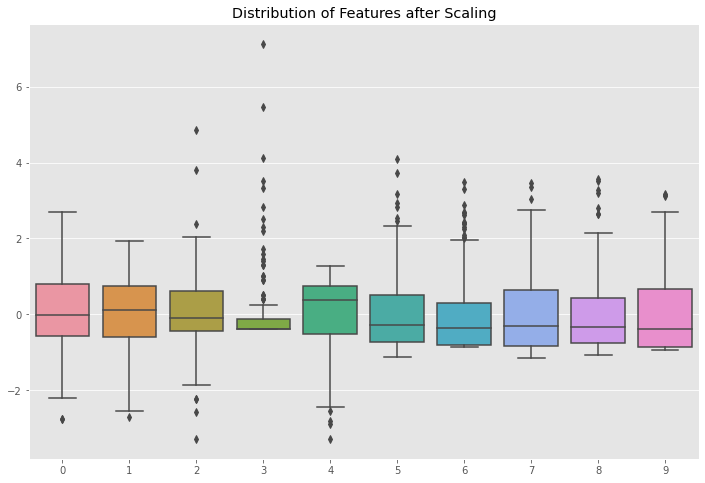

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.boxplot(data= X_train_scaled)
plt.title('Distribution of Features after Scaling')
plt.show()

### Modeling

In [76]:
# def classification_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
#   model_fit = model
#   model_fit.fit(X_train_scaled, y_train)  
#   print('Accuracy on training set: {:.5f}'
#      .format(model_fit.score(X_train_scaled, y_train)))
#   print('Accuracy on test set: {:.5f}'
#      .format(model_fit.score(X_test_scaled, y_test)))
#   model_Prediction = model_fit.predict(X_test_scaled)
#   return model_Prediction
#   data_predicted = pd.DataFrame({'Actual': y_test, 
#                                     'Predicted': model_Prediction})    
#   return data_predicted.head(10) 
#   Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(model_fit, X_test_scaled, y_test)
#   Confusion_Matrix
#   cm = confusion_matrix(y_test, model_Prediction, labels=model_fit.classes_)
#   disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_fit.classes_)
#   disp.plot()

#### **Logistic Regression**

In [77]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(log_reg.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(log_reg.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.9780
Accuracy of Logistic regression classifier on test set: 0.9836


In [78]:
Logistic_Regression_Prediction = log_reg.predict(X_test_scaled)
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': Logistic_Regression_Prediction})    
predicted_df.head(10)

,Actual,Predicted
33,not fire,not fire
239,fire,fire
141,not fire,not fire
133,fire,fire
129,fire,fire
152,not fire,not fire
194,fire,fire
231,fire,fire
183,not fire,not fire
153,not fire,not fire


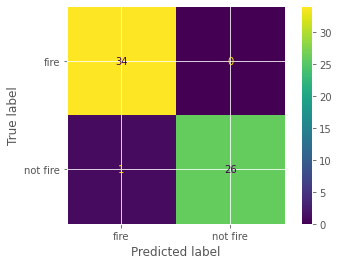

In [79]:
LR_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
LR_Confusion_Matrix
plt.show()

#### Decision Tree Classifier

In [80]:
DT_clf = DecisionTreeClassifier()
DT_clf .fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(DT_clf .score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(DT_clf .score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 1.0000
Accuracy of Logistic regression classifier on test set: 0.9508


In [81]:
DT_Prediction = DT_clf.predict(X_test_scaled)
DT_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': DT_Prediction})    
DT_predicted_df.head(10)

,Actual,Predicted
33,not fire,fire
239,fire,fire
141,not fire,not fire
133,fire,fire
129,fire,fire
152,not fire,not fire
194,fire,fire
231,fire,fire
183,not fire,not fire
153,not fire,not fire


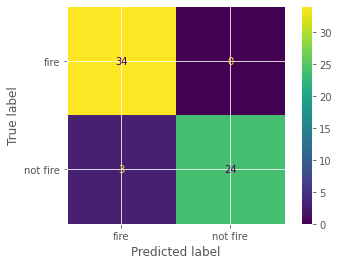

In [82]:
DT_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(DT_clf , X_test_scaled, y_test)
DT_Confusion_Matrix
plt.show()

#### Random Forest Classifier

In [83]:
# RF_clf = RandomForestClassifier()
# RF_clf.fit(X_train_scaled, y_train)
# print('Accuracy of Logistic regression classifier on training set: {:.4f}'
#      .format(RF_clf .score(X_train_scaled, y_train)))
# print('Accuracy of Logistic regression classifier on test set: {:.4f}'
#      .format(RF_clf .score(X_test_scaled, y_test)))

In [84]:
# RF_Prediction = RF_clf.predict(X_test_scaled)
# RF_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': RF_Prediction})    
# RF_predicted_df.head(10)

In [85]:
# RF_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(RF_clf , X_test_scaled, y_test)
# RF_Confusion_Matrix
# plt.show()

#### Support Vector Classifier

In [86]:
# classification_model(SVC(), X_train_scaled, y_train, X_test_scaled, y_test)

#### XGB Classifier

In [87]:
XGB_clf = XGBClassifier()
XGB_clf.fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(XGB_clf .score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(XGB_clf .score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.9890
Accuracy of Logistic regression classifier on test set: 0.9672


In [88]:
XGB_Prediction = XGB_clf.predict(X_test_scaled)
XGB_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': XGB_Prediction})    
XGB_predicted_df.head(10)

,Actual,Predicted
33,not fire,fire
239,fire,fire
141,not fire,not fire
133,fire,fire
129,fire,fire
152,not fire,not fire
194,fire,fire
231,fire,fire
183,not fire,not fire
153,not fire,not fire


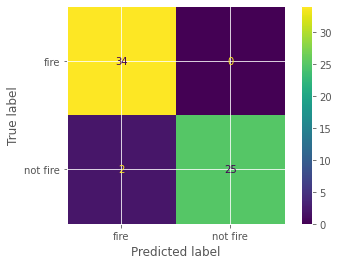

In [89]:
XGB_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(XGB_clf , X_test_scaled, y_test)
XGB_Confusion_Matrix
plt.show()

**Need to do HyperParameter Tuning**

#### Feature Importances

In [90]:
feature_importances = XGB_clf.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,FFMC,0.564051
7,ISI,0.336915
9,FWI,0.050087
1,RH,0.014146
5,DMC,0.010187
6,DC,0.009677
8,BUI,0.009168
0,Temperature,0.005770
2,Ws,0.000000
3,Rain,0.000000


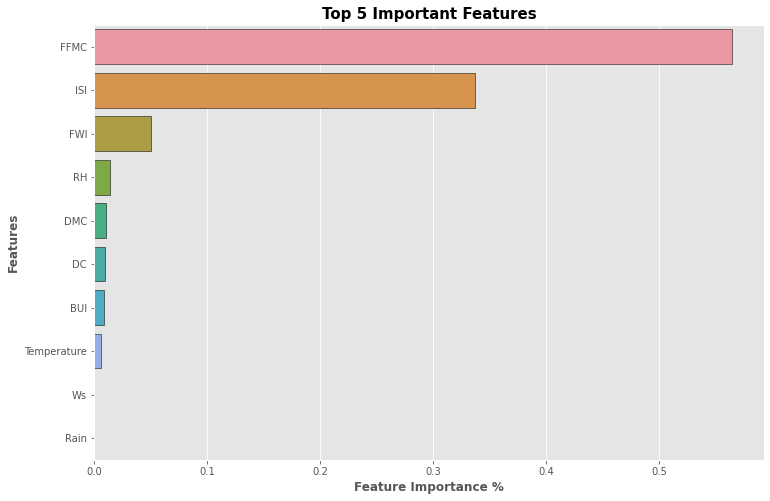

In [102]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 5 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')
plt.show()

Top Five features are: FFMC, ISI, FWI, RH, DMC

Run the model with important features only

In [93]:
X_train_new = X_train[['FFMC', 'ISI', 'FWI', 'RH', 'DMC']]
X_test_new = X_test[['FFMC', 'ISI', 'FWI', 'RH', 'DMC']]

In [97]:
X_train_new.columns

Index(['FFMC', 'ISI', 'FWI', 'RH', 'DMC'], dtype='object')

In [98]:
X_train_scaledNew, X_test_scaledNew = standard_scaler(X_train_new, X_test_new)

In [99]:
XGB_clf2 = XGBClassifier()
XGB_clf2.fit(X_train_scaledNew, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(XGB_clf2.score(X_train_scaledNew, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(XGB_clf2.score(X_test_scaledNew, y_test)))

Accuracy of Logistic regression classifier on training set: 0.9890
Accuracy of Logistic regression classifier on test set: 0.9508


In [100]:
XGB_Prediction = XGB_clf2.predict(X_test_scaledNew)
XGB_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted ': XGB_Prediction})    
XGB_predicted_df.head(10)

,Actual,Predicted
33,not fire,fire
239,fire,fire
141,not fire,not fire
133,fire,fire
129,fire,fire
152,not fire,not fire
194,fire,fire
231,fire,fire
183,not fire,not fire
153,not fire,not fire


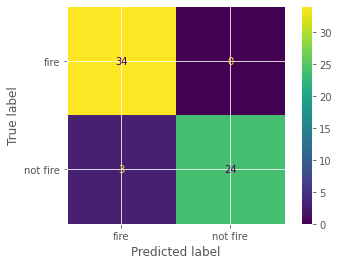

In [101]:
XGB_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(XGB_clf2 , X_test_scaledNew, y_test)
XGB_Confusion_Matrix
plt.show()